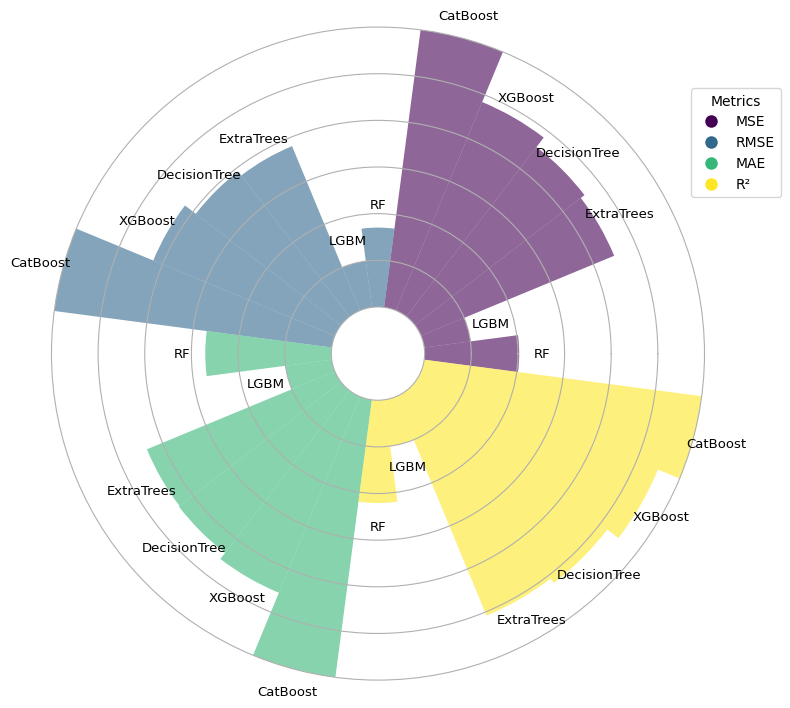

In [ ]:
from matplotlib.lines import Line2D
from matplotlib import cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Read data
results_df = pd.read_excel('model2.xlsx')

# Force uniform column names
results_df.columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R²']

# Normalization processing
scaler = MinMaxScaler()
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
data_normalized = results_df[metrics].copy()
data_normalized[:] = scaler.fit_transform(data_normalized)

# Reverse error metrics (smaller MSE/RMSE/MAE is better)
data_normalized[['MSE', 'RMSE', 'MAE']] = 1 - data_normalized[['MSE', 'RMSE', 'MAE']]

# Merge model column
data_normalized['Model'] = results_df['Model']

def plot_radar_bars(data, num_metrics, num_models):
    models = data['Model'].tolist()
    metrics = data.columns[:-1].tolist()
    
    assert len(metrics) == num_metrics, f"Expected {num_metrics} metrics, but got {len(metrics)}"
    assert len(models) == num_models, f"Expected {num_models} models, but got {len(models)}"
    
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]
    
    color_map = cm.viridis(np.linspace(0, 1, num_metrics))
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    inner_radius = 0.2
    width = (2 * np.pi / num_metrics) / num_models
    
    for i, metric in enumerate(metrics):
        values = data[metric].tolist()
        angle = angles[i]
        for j, value in enumerate(values):
            angle_offset = angle + j * width
            ax.bar(angle_offset, value + inner_radius, bottom=inner_radius, width=width,
                   label=models[j] if i == 0 else "", alpha=0.6, color=color_map[i])
            
            x_label = angle_offset
            y_label = value + inner_radius + 0.3
            ax.text(x_label, y_label, models[j], ha='center', va='center', fontsize=9.5, rotation=0)
    
    ax.set_yticklabels([])
    ax.set_xticks([])
    
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=metrics[i]) 
                      for i in range(num_metrics)]
    ax.legend(handles=legend_elements, title='Metrics', bbox_to_anchor=(0.95, 0.9), loc='upper left')
    ax.spines['polar'].set_visible(False)
    plt.savefig("2.pdf", format='pdf', bbox_inches='tight', dpi=1200)
    plt.tight_layout()
    plt.show()

# Call function using normalized data
plot_radar_bars(data_normalized, 4, 6)

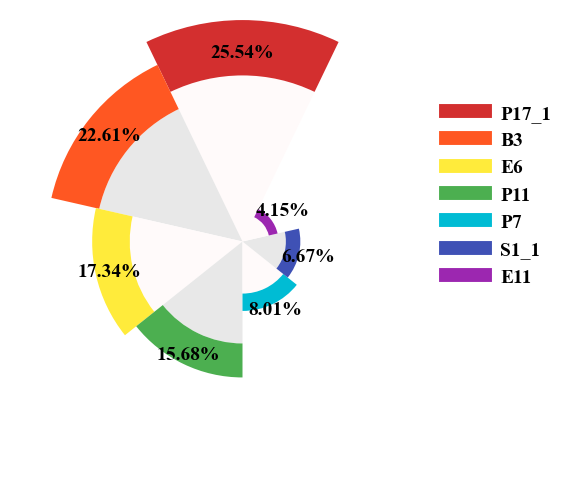

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager

# Chart data
percentages = [25.54, 22.61, 17.34, 15.68, 8.01, 6.67, 4.15]
colors = ['#D32F2F', '#FF5722',   '#FFEB3B',  '#4CAF50',  '#00BCD4', '#3F51B5', '#9C27B0', '#673AB7']
light_gray = '#E8E8E8'  
off_white = '#FFFAFA'    

# Key modification: calculate precise angle span for each sector
n = len(percentages)
angle_span = 2 * np.pi / n
start_angles = np.linspace(0, 2*np.pi - angle_span, n)

# Define rotation angle parameter (unit: radians)
rotation_angle = np.pi / 2  

# Rotate angles and handle boundary conditions
rotated_angles = [(angle + rotation_angle) % (2 * np.pi) for angle in start_angles]

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw bottom color section (3/4 height)
for i, (percentage, angle) in enumerate(zip(percentages, rotated_angles)):
    bottom_color = [off_white, light_gray][i % 2]
    ax.bar(angle, percentage * 3/4, width=angle_span, color=bottom_color, bottom=0)

# Draw top colored section (1/4 height)
for i, (percentage, angle, color) in enumerate(zip(percentages, rotated_angles, colors)):
    ax.bar(angle, percentage / 4, width=angle_span, color=color, bottom=percentage * 3/4)

# Add percentage labels
for i, (bar, percentage) in enumerate(zip(ax.patches, percentages)):
    angle = bar.get_x() + angle_span / 2  # Use precise span to calculate center angle
    height = bar.get_height() + 2.7
    if i < len(percentages):
        ax.text(angle, height, f'{percentage}%', 
                ha='center', va='center', size=14, fontweight='bold')

# Add legend
labels = ['P17_1', 'B3', 'E6', 'P11', 'P7', 'S1_1', 'E11']
handles = [plt.Line2D([0], [0], color=color, lw=10) for color in colors]  
legend_font = font_manager.FontProperties(family='Times New Roman', weight='bold', size=14)
ax.legend(handles, labels, bbox_to_anchor=(0.9, 0.6), loc='center left', prop=legend_font, frameon=False, markerscale=2.5)

# Adjust subplot position parameters (optional)
plt.subplots_adjust(bottom=0.1)  # Adjust bottom margin as needed

# Remove radial labels and ticks
ax.set_yticklabels([])  # Remove radial labels
ax.set_yticks([])       # Remove radial grid lines
ax.set_xticks([])       # Remove angle tick lines

# Remove polar coordinate background and circles
ax.spines['polar'].set_visible(False)
plt.savefig("2.pdf", format='pdf', bbox_inches='tight', dpi=1200)
plt.show()